# This notebook analyzes the pucker (P) for the rg and unmod for the central 14 steps around the lesion

## First of all, import usful libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import sys, getopt

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_color_codes("pastel")
sns.set(style="darkgrid")

/Users/yuqincai/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Read data, first 14 columns are for rg; second 14 clumns are for unmod

In [41]:
df=pd.read_csv("./rg14_unmod14_pucker", header=None, delim_whitespace=True).reset_index()

In [42]:
df[:5]

index         0         1         2         3         4         5        6  \
0      0  153.0374  140.9998   75.1768  175.4603  158.1120  157.8189 -81.7442   
1      1 -147.0003  144.4125  116.6530  151.7402  141.7822  136.8996 -82.8100   
2      2 -175.4837  155.9032  117.3829  154.6575  145.8239  153.3610 -81.0977   
3      3  168.7289  159.2163   98.3497  148.9371  147.7529  159.8673 -97.0441   
4      4  166.8245  153.6057   84.1246  148.5323  158.5704  175.4127 -84.5735   

          7         8    ...           18        19        20        21  \
0  143.7830  151.9379    ...     131.1198 -171.1246 -164.3309  152.6581   
1  140.0350  168.2030    ...     143.7810 -172.9550  163.2716  140.3540   
2 -178.4987  137.0647    ...     137.3649 -178.8621 -166.8332  141.3421   
3  179.5154  131.7899    ...     146.4671  157.5138 -179.4263  125.3473   
4  163.8817  144.8753    ...     144.6842  164.9043  133.5849  133.8841   

        22        23        24        25        26        27  
0  97.2419 -175.6809  162.2935   83.1084  146.2793 -149.9850  
1  86.3949 -177.1616  148.9794   77.9513  159.8186  175.4065  
2  82.5641 -156.5114  147.9170  154.7349  135.1513 -158.3447  
3  78.3762  165.6079  152.4096  141.2003  153.0452 -124.7039  
4  48.6370  167.1338  153.8144 -158.0819  147.6191 -127.4302  

[5 rows x 29 columns]

In [43]:
df.shape

(70000, 29)

## Create the column names; 

In [45]:
list1=["index"]
list2=["rg"+str(x) for x in range(67,81)]
list3=["unmod"+str(x) for x in range(67,81)]
names= list1+list2+list3
print names
print len(names)

['index', 'rg67', 'rg68', 'rg69', 'rg70', 'rg71', 'rg72', 'rg73', 'rg74', 'rg75', 'rg76', 'rg77', 'rg78', 'rg79', 'rg80', 'unmod67', 'unmod68', 'unmod69', 'unmod70', 'unmod71', 'unmod72', 'unmod73', 'unmod74', 'unmod75', 'unmod76', 'unmod77', 'unmod78', 'unmod79', 'unmod80']
29


## Assign column names, and review the dataframe

In [46]:
df.columns=names
print df.shape
df[:5]
print df.columns

(70000, 29)
Index([u'index', u'rg67', u'rg68', u'rg69', u'rg70', u'rg71', u'rg72', u'rg73',
       u'rg74', u'rg75', u'rg76', u'rg77', u'rg78', u'rg79', u'rg80',
       u'unmod67', u'unmod68', u'unmod69', u'unmod70', u'unmod71', u'unmod72',
       u'unmod73', u'unmod74', u'unmod75', u'unmod76', u'unmod77', u'unmod78',
       u'unmod79', u'unmod80'],
      dtype='object')


In [47]:
df["rg78"][:5]

0    157.1066
1    150.1247
2    142.8033
3    142.9385
4    129.2832
Name: rg78, dtype: float64

# Preview a step far away from the lesion

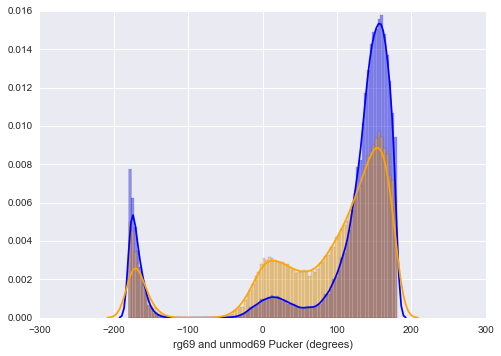

In [49]:
fig, ax = plt.subplots()
sns.distplot(df['rg69'],bins=100, color='blue')
sns.distplot(df['unmod69'],bins=100,color='orange')
ax.set_xlabel("rg69 and unmod69 Pucker (degrees)")

# Preview the lesion step

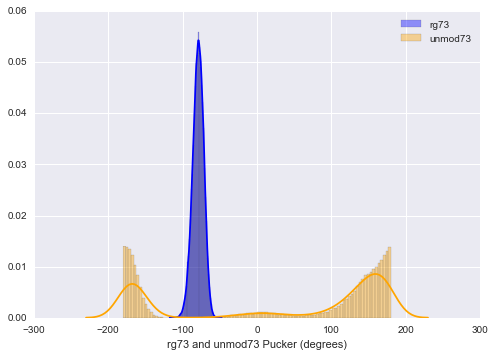

In [50]:
fig, ax = plt.subplots()
sns.distplot(df['rg73'],bins=100,color='blue',label='rg73')
sns.distplot(df['unmod73'],bins=100, color='orange',label='unmod73')
plt.legend()
ax.set_xlabel("rg73 and unmod73 Pucker (degrees)")

# Normalize the range to 0 to 360 degrees

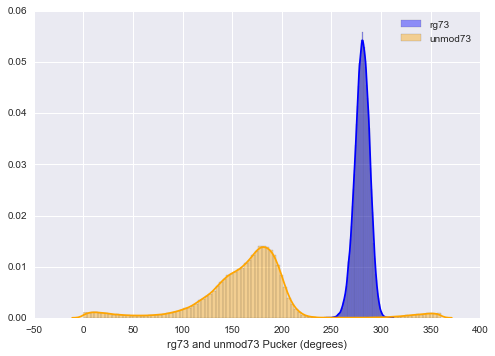

In [51]:
fig, ax = plt.subplots()
df['rg73']=df['rg73'].map(lambda x: x+360 if x <0 else x)
df['unmod73']=df['unmod73'].map(lambda x: x+360 if x <0 else x)
sns.distplot(df['rg73'],color='blue',bins=100,label='rg73')
sns.distplot(df['unmod73'],color='orange',bins=100,label='unmod73')
plt.legend()
ax.set_xlabel("rg73 and unmod73 Pucker (degrees)")

# I am going to define a function for this plot so that I can apply to all plots 

In [52]:
def histplot(step):
    rg='rg'+str(step)
    unmod='unmod'+str(step)
    fig, ax = plt.subplots(figsize=(10,10))
    df[rg]=df[rg].map(lambda x: x+360 if x <0 else x)
    df[unmod]=df[unmod].map(lambda x: x+360 if x <0 else x)
    sns.distplot(df[rg],bins=100,color='blue',label=rg)
    sns.distplot(df[unmod],bins=100,color='orange',label=unmod)
    plt.legend()
    
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
    ax.set_xlabel(rg +" and " + unmod + " pucker in degrees")
    plt.savefig("./pucker_plots/pucker_hist_"+str(step)+".png")

## let's enumerate all steps

67
68
69
70
71
72
73
74
75
76
77
78
79
80


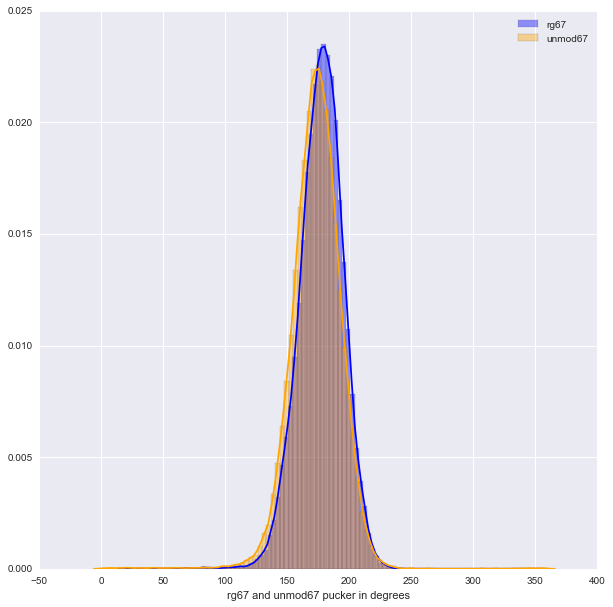

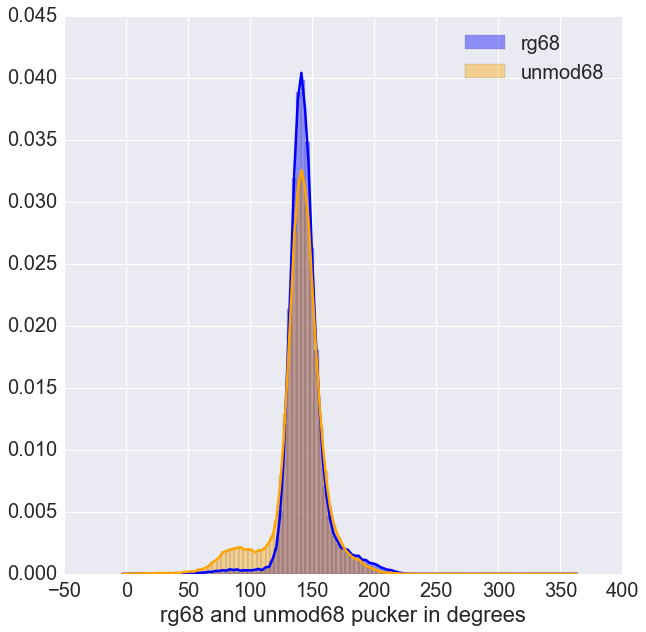

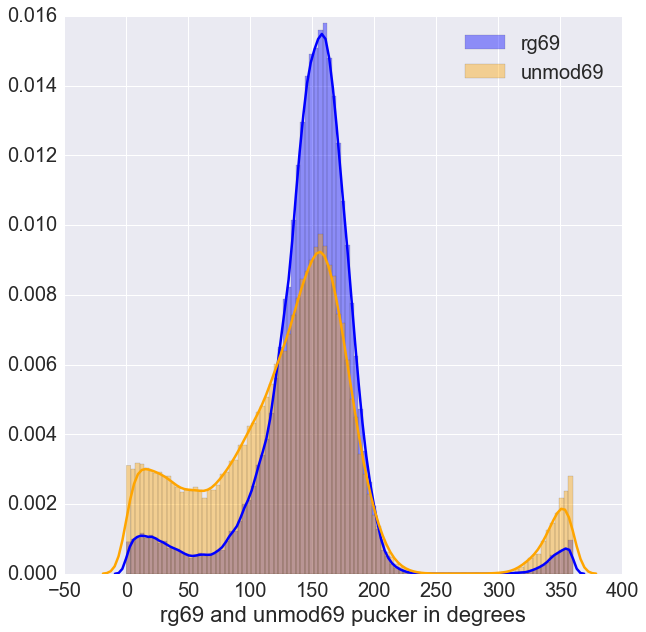

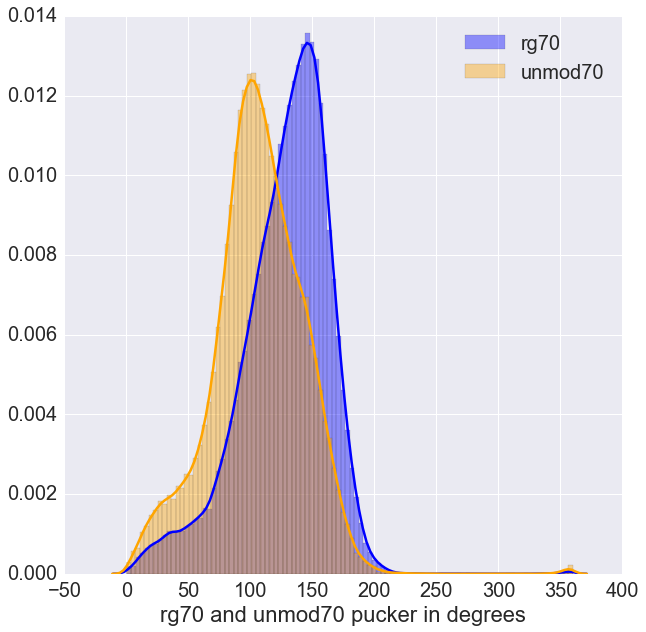

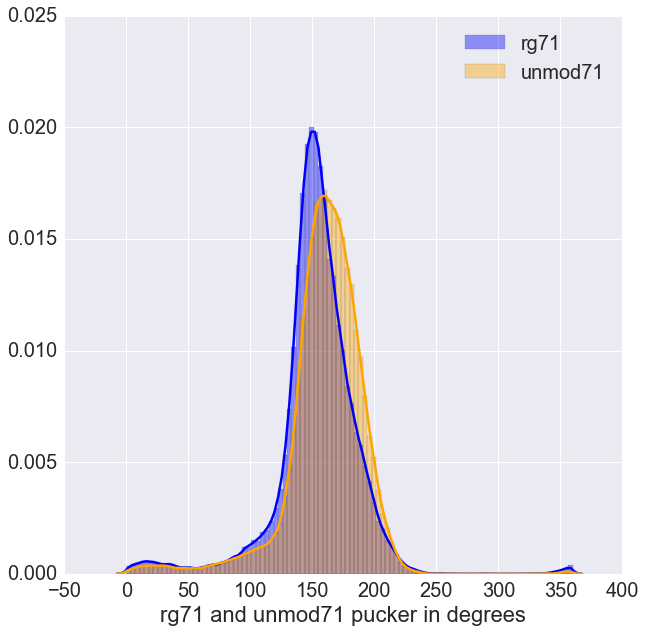

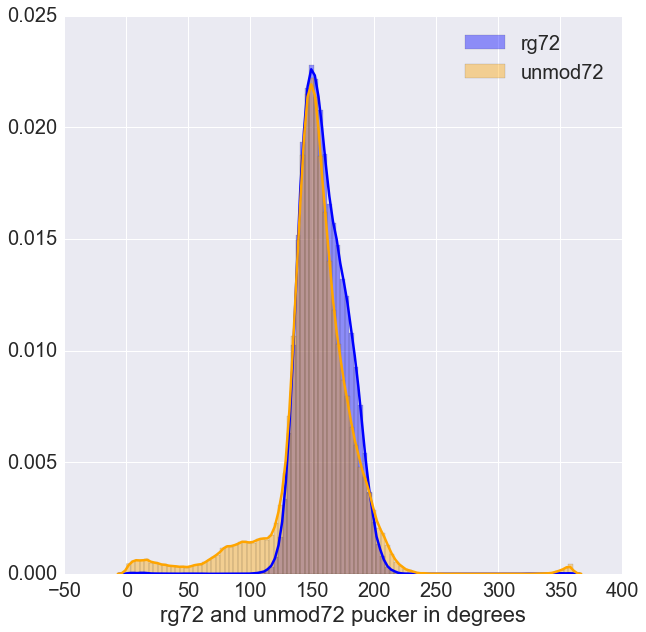

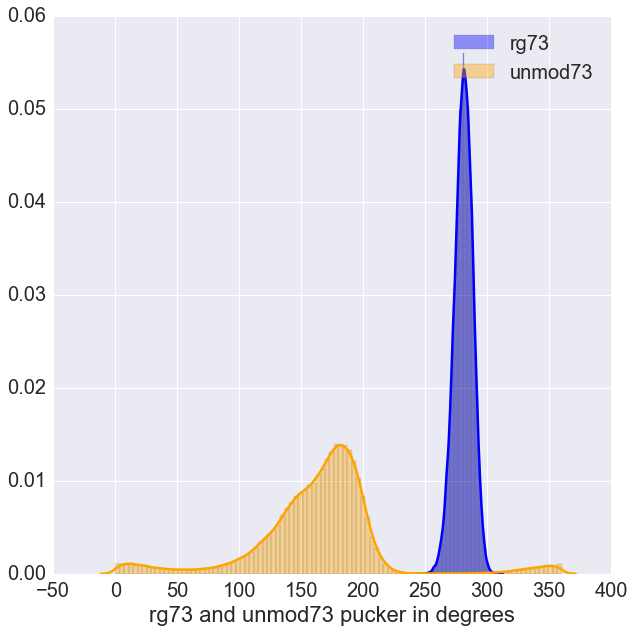

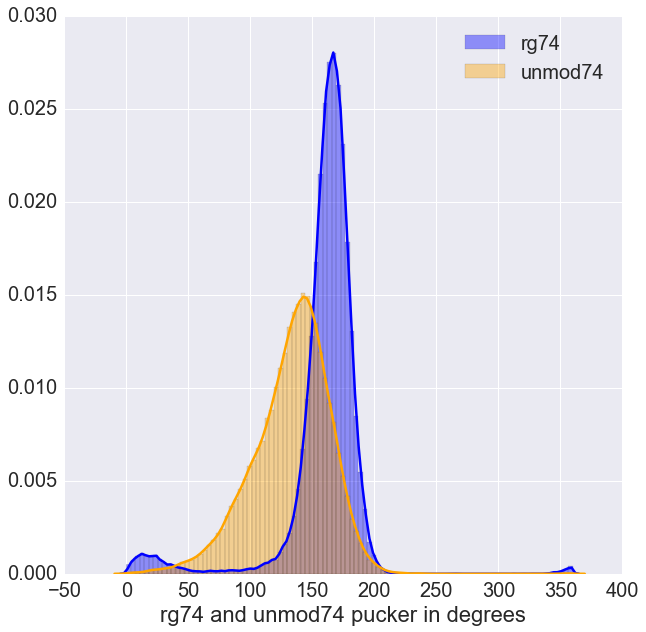

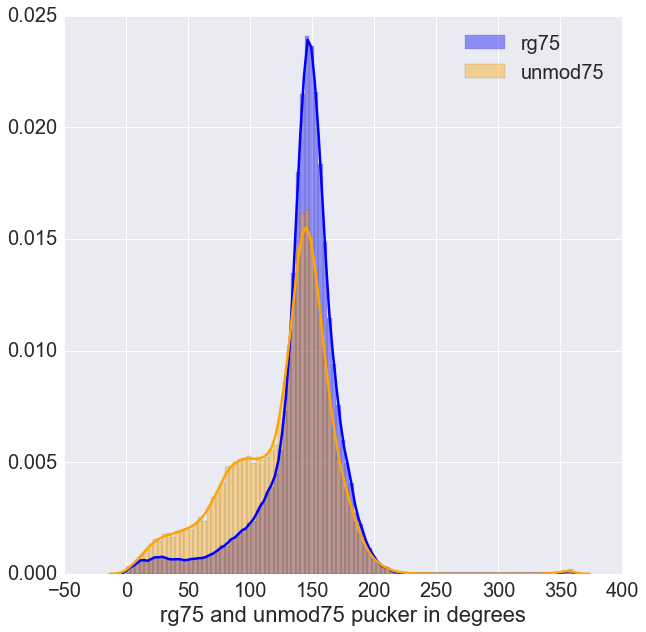

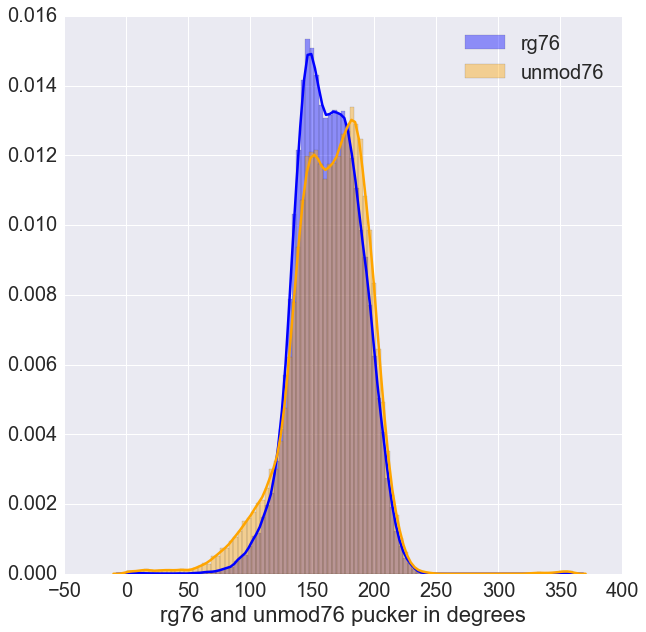

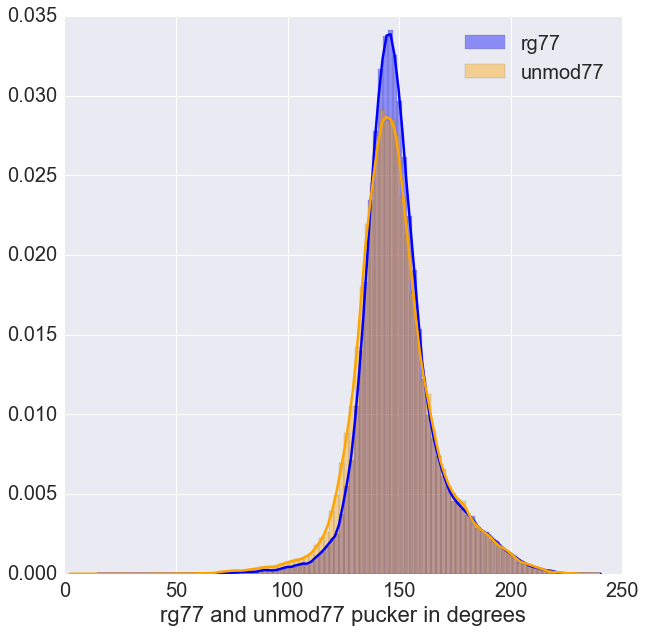

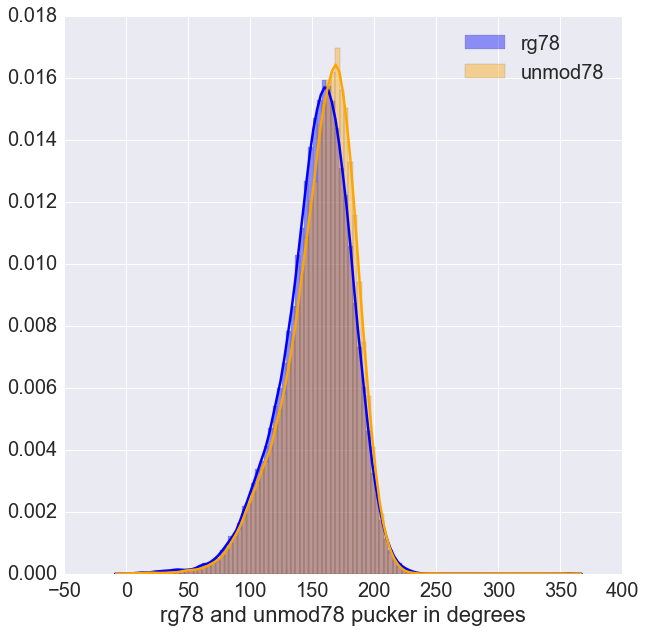

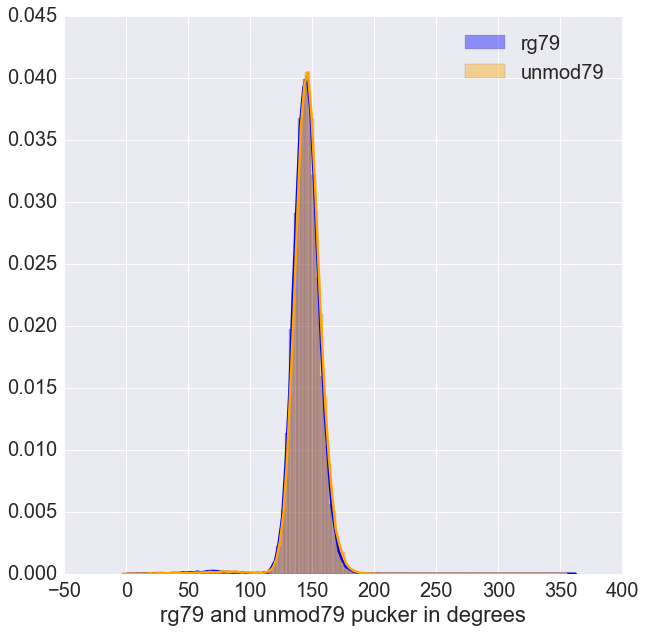

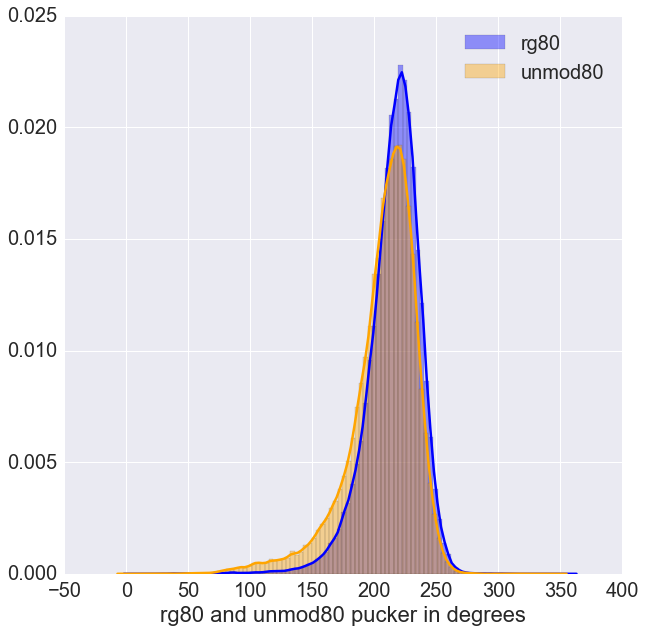

In [53]:
for i in range(67,81):
    print i
    histplot(i)